## resnet50

### 備考

学習済みモデル[`imagenet`](http://www.image-net.org/)を使っているので少ないエポック数である程度の精度を出せます。

### ディレクトリ構成

```
resnet50
├── data
│   ├── inuneko_task
│        ├── cats
│             ├── cat1.jpg
│             ├── cat2.jpg
│             ├── ...
│        ├── dogs
│             ├── dog1.jpg
│             ├── dog2.jpg
│             ├── ...
│        ├── other_task ...
│        ├── other_task ...
│   ├── weights
│        ├── inuneko_task.h5
│        ├── other_task.h5  
│        ├── ... 
│
│   ├── test_data
│        ├── inuneko_task
│             ├── test1.jpg
│             ├── test2.jpg
│             ├── ...
```
### 参考
https://www.kaggle.com/cokastefan/keras-resnet-50/

詳しい実装<br>
https://colab.research.google.com/github/d2l-ai/d2l-en-colab/blob/master/chapter_convolutional-modern/resnet.ipynb




In [ ]:
%cd /content/drive/MyDrive/resnet50

/content/drive/MyDrive/resnet50


In [ ]:
%cd data/inuneko_task/
!unzip ./training_set.zip

In [ ]:
%cd /content/drive/MyDrive/resnet50
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, runniЃng this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

/content/drive/MyDrive/resnet50
['weights', 'data', 'test_data', '.ipynb_checkpoints']


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#resnet_weights_path = './weight/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   )

image_size = 224
batch_size = 10
train_generator = data_generator.flow_from_directory(
        './data/inuneko_task',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

num_classes = len(train_generator.class_indices)

Found 8005 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights="imagenet"))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
count = sum([len(files) for r, d, files in os.walk("./data/inuneko_task")])

model.fit_generator(
        train_generator,
        steps_per_epoch=int(count/batch_size),
        epochs=10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
800/800 [==============================] - 120s 146ms/step - loss: 0.5931 - accuracy: 0.8408
Epoch 2/10
800/800 [==============================] - 120s 150ms/step - loss: 0.2514 - accuracy: 0.8965
Epoch 3/10
800/800 [==============================] - 118s 148ms/step - loss: 0.2435 - accuracy: 0.8959
Epoch 4/10
800/800 [==============================] - 118s 147ms/step - loss: 0.2289 - accuracy: 0.9113
Epoch 5/10
800/800 [==============================] - 118s 148ms/step - loss: 0.2285 - accuracy: 0.9103
Epoch 6/10
800/800 [==============================] - 117s 147ms/step - loss: 0.2089 - accuracy: 0.9148
Epoch 7/10
800/800 [==============================] - 116s 145ms/step - loss: 0.2054 - accuracy: 0.9174
Epoch 8/10
800/800 [==============================] - 116s 145ms/step - loss: 0.2085 - accuracy: 0.9160
Epoch 9/10
800/800 [==============================] - 116s 145ms/step - loss: 0.1849 - accuracy: 0.9251
Epoch 10/10
800/800 [==============================] - 116s 145m

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


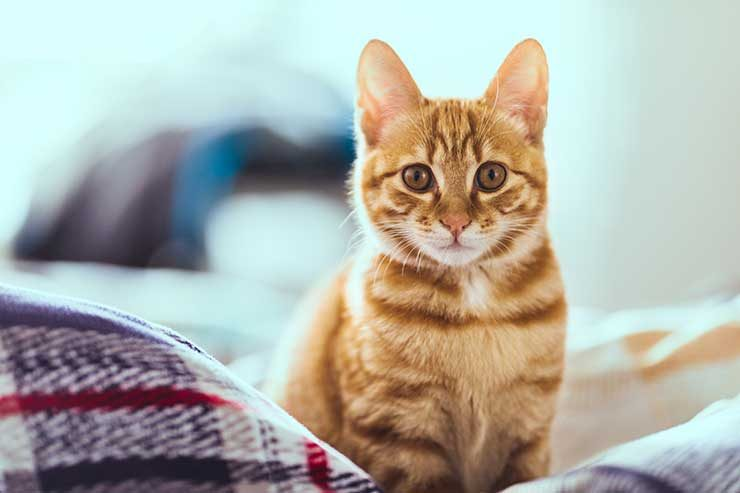

cats


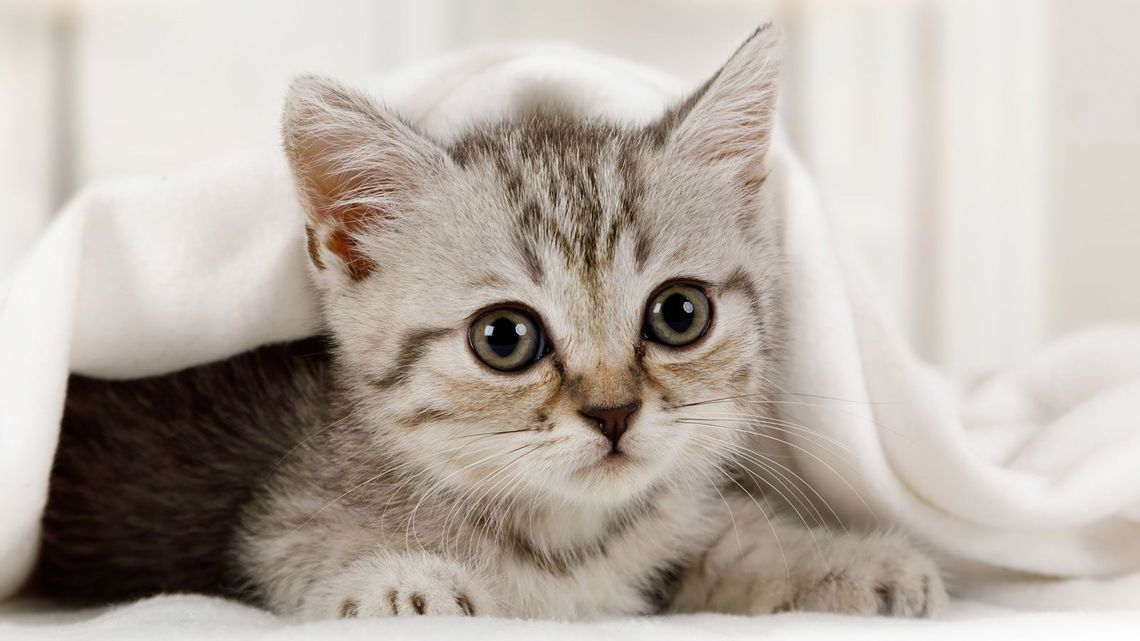

cats


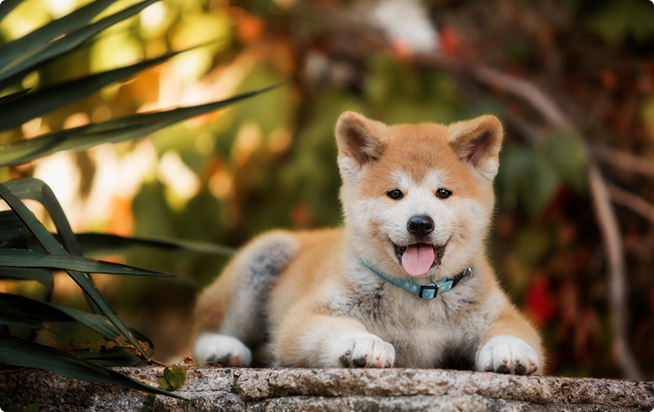

dogs


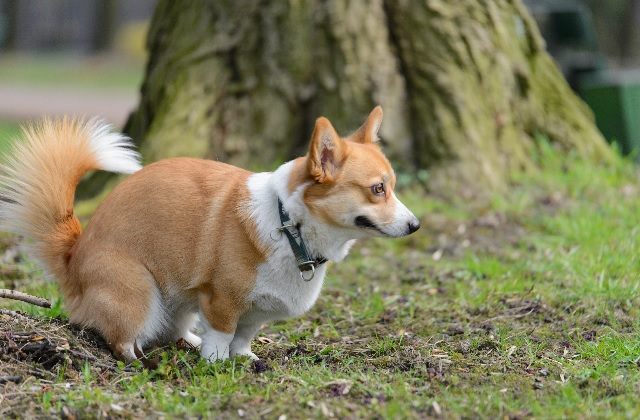

dogs


In [ ]:
from IPython.display import Image, display

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

test_path = "test_data/inuneko_task/"
test_img_path = [test_path + img for img in os.listdir(test_path)]

imgs = read_and_prep_images(test_img_path)
predictions = model.predict_classes(imgs)
classes = dict((v,k) for k,v in train_generator.class_indices.items())

for img, prediction in zip(test_img_path, predictions):
    display(Image(img))
    print(classes[prediction])

In [ ]:
# モデルの保存
model.save('weights/inuneko_task.h5')

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('weights/inuneko_task.h5')

# モデルのアーキテクチャを表示
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_7 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)             

In [ ]:
classes = dict((v,k) for k,v in train_generator.class_indices.items())


In [ ]:
classes

{0: 'cats', 1: 'dogs'}